In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
import csv

In [18]:
data_path = '499_GRN_ANT_mass_changes.csv'
data_file = open(data_path, 'U')



In [4]:
csv.reader?

In [19]:
rows = [row for row in csv.reader(data_file)]

In [6]:
open?

In [7]:
file?

In [13]:
rows[9:]

[['TIME (year.decimal)', 'Greenland mass (Gt)', 'Antarctica mass (Gt)'],
 ['2002.29', '1490.68', '967.2'],
 ['2002.35', '1485.69', '978.55'],
 ['2002.62', '1286.84', '512.02'],
 ['2002.71', '1257.85', '858.85'],
 ['2002.79', '1257.17', '693.87'],
 ['2002.87', '1288.44', '591.8'],
 ['2002.96', '1336.86', '657.56'],
 ['2003.04', '1354.37', '477.02'],
 ['2003.12', '1363.42', '545.79'],
 ['2003.2', '1426.92', '494.39'],
 ['2003.29', '1479.79', '577.3'],
 ['2003.36', '1504.11', '679.3'],
 ['2003.54', '1324.7', '514.42'],
 ['2003.62', '1162.43', '555.6'],
 ['2003.71', '1104.46', '603.51'],
 ['2003.79', '1126.45', '557.76'],
 ['2003.87', '1168.57', '527.64'],
 ['2003.96', '1155.66', '556.8'],
 ['2004.02', '1125.85', '483.31'],
 ['2004.13', '1133.01', '77.93'],
 ['2004.21', '1159.06', '366.8'],
 ['2004.29', '1249.03', '290.7'],
 ['2004.37', '1235.6', '564.23'],
 ['2004.46', '1172.84', '552.07'],
 ['2004.54', '1092.28', '335.96'],
 ['2004.62', '962.16', '304.95'],
 ['2004.71', '970.66', '380.4'

In [21]:
raw_data = rows[9:]

In [22]:
header_row = raw_data[0]
raw_data = raw_data[1:]

In [23]:
raw_data = [[row[0], float(row[1]), float(row[2]), float(row[1]) + float(row[2])] for row in raw_data]

In [24]:
raw_data

[['2002.29', 1490.68, 967.2, 2457.88],
 ['2002.35', 1485.69, 978.55, 2464.24],
 ['2002.62', 1286.84, 512.02, 1798.86],
 ['2002.71', 1257.85, 858.85, 2116.7],
 ['2002.79', 1257.17, 693.87, 1951.04],
 ['2002.87', 1288.44, 591.8, 1880.24],
 ['2002.96', 1336.86, 657.56, 1994.4199999999998],
 ['2003.04', 1354.37, 477.02, 1831.3899999999999],
 ['2003.12', 1363.42, 545.79, 1909.21],
 ['2003.2', 1426.92, 494.39, 1921.31],
 ['2003.29', 1479.79, 577.3, 2057.09],
 ['2003.36', 1504.11, 679.3, 2183.41],
 ['2003.54', 1324.7, 514.42, 1839.12],
 ['2003.62', 1162.43, 555.6, 1718.0300000000002],
 ['2003.71', 1104.46, 603.51, 1707.97],
 ['2003.79', 1126.45, 557.76, 1684.21],
 ['2003.87', 1168.57, 527.64, 1696.21],
 ['2003.96', 1155.66, 556.8, 1712.46],
 ['2004.02', 1125.85, 483.31, 1609.1599999999999],
 ['2004.13', 1133.01, 77.93, 1210.94],
 ['2004.21', 1159.06, 366.8, 1525.86],
 ['2004.29', 1249.03, 290.7, 1539.73],
 ['2004.37', 1235.6, 564.23, 1799.83],
 ['2004.46', 1172.84, 552.07, 1724.9099999999999]

In [25]:
lines = plt.plot([row[0] for row in raw_data], [row[3] for row in raw_data], label='Total Ice Mass')
line = lines[0]

In [13]:
import matplotlib.lines as mlines
blue_line = mlines.Line2D([row[0] for row in raw_data], [row[3] for row in raw_data], color='blue', label='Total Ice Mass')
plt.legend(handles=[blue_line])
plt.show()

NameError: name 'raw_data' is not defined

In [31]:
line = line[0]

In [27]:
lines = plt.plot([row[0] for row in raw_data], [row[3] for row in raw_data], color='#74BBFB', label='Total Ice Mass')
line = lines[0]
line.axes.set_xlabel('Date (Year)')
line.axes.set_ylabel('Mass (Gt)')
plt.legend(loc = 'best')
plt.show()

In [38]:
plt.colors?

In [30]:
plt.plot([row[0] for row in raw_data], [row[1] for row in raw_data], 'go', label='Greenland Ice Mass', markersize=5)
lines = plt.plot([row[0] for row in raw_data], [row[2] for row in raw_data], 'ro', label='Antarctica Ice Mass', markersize=5)
print lines
line = lines[0]
line.axes.set_xlabel('Year')
line.axes.set_ylabel('Mass (Gt)')
plt.legend(loc = 'best')
plt.show()

In [10]:
plt.figure(figsize = (8,6), dpi = 400)
time = np.array([float(row[0]) for row in raw_data])
total_ice_mass = np.array([row[3] for row in raw_data])
regression = stats.linregress(time, total_ice_mass)

plt.plot(time, total_ice_mass, color='#74BBFB', label='Total Ice Mass')
regression_label = 'y = {m:.2e}x + {b:.2e}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=regression.slope, b=regression.intercept, r=regression.rvalue, r2=regression.rvalue ** 2)
plt.plot(time, regression.slope * time + regression.intercept, '--', label=regression_label)

plt.grid(True)
plt.xlabel('Date (Year)')
plt.ylabel('Mass (Gt) (Normalized)')
plt.legend(loc = 'best')

NameError: name 'raw_data' is not defined

In [67]:
np.polyfit(time, total_ice_mass, 1)


array([ -4.21564440e+02,   8.46678904e+05])

In [65]:
time = [float(row[0]) for row in raw_data]

In [69]:
import scipy

In [70]:
import np.stats

ImportError: No module named np.stats

In [87]:
import scipy.stats as stats
regression = stats.linregress(time, total_ice_mass)
print regression

LinregressResult(slope=-421.56443975484166, intercept=846678.90369717579, rvalue=-0.98525532886110578, pvalue=1.0537128742542539e-107, stderr=6.2316257689514236)


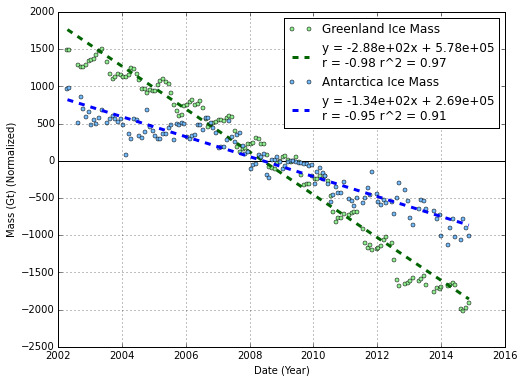

In [245]:
plt.figure(figsize = (8,6), dpi = 400)
time = np.array([float(row[0]) for row in raw_data])
greenland_ice_mass = np.array([row[1] for row in raw_data])
greenland_reg = stats.linregress(time, greenland_ice_mass)

antarctica_ice_mass = np.array([row[2] for row in raw_data])
antarctica_reg = stats.linregress(time, antarctica_ice_mass)

plt.plot(np.linspace(2002,2016, 100), np.linspace(2002,2016, 100) * 0, color='black')
plt.plot(time, greenland_ice_mass, 'o', color='lightgreen', label='Greenland Ice Mass', markersize=4)
greenland_reg_label = 'y = {m:.2e}x + {b:.2e}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=greenland_reg.slope, b=greenland_reg.intercept, r=greenland_reg.rvalue, r2=greenland_reg.rvalue ** 2)
plt.plot(time, greenland_reg.slope * time + greenland_reg.intercept, '--', color='darkgreen', label=greenland_reg_label, linewidth=3)

plt.plot(time, antarctica_ice_mass, 'o', color='#74BBFB', label='Antarctica Ice Mass', markersize=4)
antarctica_reg_label ='y = {m:.2e}x + {b:.2e}\nr = {r:.2f} r^2 = {r2:.2f}'\
    .format(m=antarctica_reg.slope, b=antarctica_reg.intercept, r=antarctica_reg.rvalue, r2=antarctica_reg.rvalue ** 2)
plt.plot(time, antarctica_reg.slope * time + antarctica_reg.intercept, '--', color='blue', label=antarctica_reg_label, linewidth=3)

plt.grid(True)
plt.xlabel('Date (Year)')
plt.ylabel('Mass (Gt) (Normalized)')
plt.legend(loc = 'best')

In [102]:
plt.axis?

In [125]:
plt.hist?

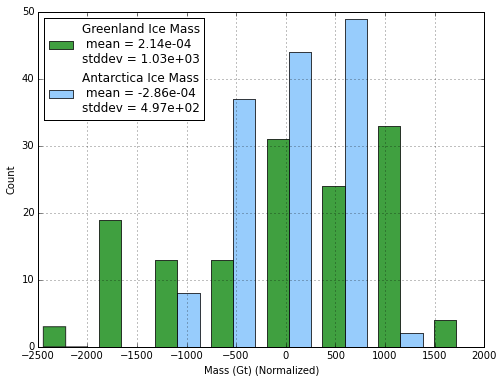

0.000214285714277 1031.44935807 -0.000285714285721 496.720531486


In [236]:
plt.figure(figsize = (8,6), dpi = 400)
time = np.array([float(row[0]) for row in raw_data])
greenland_ice_mass = np.array([row[1] for row in raw_data])
antarctica_ice_mass = np.array([row[2] for row in raw_data])

plt.hist([greenland_ice_mass, antarctica_ice_mass], np.linspace(-2500,2000,9), color=['green', '#74BBFB'], alpha=0.75)
greenland_mean = np.mean(greenland_ice_mass)
greenland_stddev = np.std(greenland_ice_mass)
greenland_label = 'Greenland Ice Mass\n mean = {mean:.2e}\nstddev = {stddev:.2e}'\
    .format(mean = greenland_mean, stddev=greenland_stddev)

antarctica_mean = np.mean(antarctica_ice_mass)
antarctica_stddev = np.std(antarctica_ice_mass)
antarctica_label = 'Antarctica Ice Mass\n mean = {mean:.2e}\nstddev = {stddev:.2e}'\
    .format(mean = antarctica_mean, stddev=antarctica_stddev)

plt.legend([greenland_label, antarctica_label], loc='best')
plt.xlabel('Mass (Gt) (Normalized)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

print greenland_mean, greenland_stddev, antarctica_mean, antarctica_stddev


In [174]:
[entry + [entry[1]/entry[3]] for entry in raw_data]

[['2002.29', 1490.68, 967.2, 2457.88, 0.6064901459794619],
 ['2002.35', 1485.69, 978.55, 2464.24, 0.6028998798818298],
 ['2002.62', 1286.84, 512.02, 1798.86, 0.7153641750886672],
 ['2002.71', 1257.85, 858.85, 2116.7, 0.5942504842443426],
 ['2002.79', 1257.17, 693.87, 1951.04, 0.6443589060193539],
 ['2002.87', 1288.44, 591.8, 1880.24, 0.6852529464323703],
 ['2002.96', 1336.86, 657.56, 1994.4199999999998, 0.6703001373832994],
 ['2003.04', 1354.37, 477.02, 1831.3899999999999, 0.7395311757735927],
 ['2003.12', 1363.42, 545.79, 1909.21, 0.7141278329780381],
 ['2003.2', 1426.92, 494.39, 1921.31, 0.7426807750961584],
 ['2003.29', 1479.79, 577.3, 2057.09, 0.7193608446883704],
 ['2003.36', 1504.11, 679.3, 2183.41, 0.6888811537915462],
 ['2003.54', 1324.7, 514.42, 1839.12, 0.7202901387620166],
 ['2003.62', 1162.43, 555.6, 1718.0300000000002, 0.6766063456400645],
 ['2003.71', 1104.46, 603.51, 1707.97, 0.6466507022957078],
 ['2003.79', 1126.45, 557.76, 1684.21, 0.6688298965093427],
 ['2003.87', 11

In [221]:
scipy.stats.describe([entry[1] for entry in raw_data])

print np.mean(antarctica_ice_mass), np.average(antarctica_ice_mass)




-0.000285714285721 -0.000285714285721


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.figure(figsize = (8,6), dpi = 400)
time = np.array([float(row[0]) for row in raw_data])
greenland_ice_mass = np.array([row[1] for row in raw_data])
antarctica_ice_mass = np.array([row[2] for row in raw_data])

plt.stackplot(time, greenland_ice_mass, antarctica_ice_mass, alpha=0.75, colors=['green', '#74BBFB'], baseline='zero')
plt.legend(['Greenland Ice Mass', 'Antarctica Ice Mass'], loc='best')
plt.xlabel('Date (Year)')
plt.ylabel('Mass (Gt) (Normalized)')

greenland_patch = patches.Patch(color='green', label='Greenland Ice Mass')
antarctica_patch = patches.Patch(color='#74BBFB', label='Antarctica Ice Mass')
plt.legend(handles=[greenland_patch, antarctica_patch], loc='best')
plt.grid(True)
plt.show()


NameError: name 'raw_data' is not defined

In [2]:
print greenland_ice_mass[-1], antarctica_ice_mass[-1]

NameError: name 'greenland_ice_mass' is not defined

In [3]:
f = 5.7
f

5.7

In [4]:
f.real


5.7

In [5]:

max(time)

NameError: name 'time' is not defined